# Nareg Najarian, ID: A09185210

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score,\
    GridSearchCV
from sklearn.datasets import make_regression, make_classification, make_moons,\
    make_gaussian_quantiles
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
    classification_report, confusion_matrix, plot_confusion_matrix,\
    roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,\
    GradientBoostingRegressor, GradientBoostingClassifier,\
    AdaBoostRegressor, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR, SVC 
from sklearn.calibration import CalibratedClassifierCV

# Decision Tree Regressor

In [2]:
X, y = make_regression(n_samples = 1000, n_features = 12, random_state = 10)
print(X.shape)
print(y.shape)

(1000, 12)
(1000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Decision Tree Classifier

## DecisionTree, RandomForest, GradientBoosting, AdaBoost

In [4]:
def Decision_Boundary(model, X, y, n_points, n_classes, colors, class_names):
    
    xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
    ymin, ymax = np.min(X[:,1]), np.max(X[:,1])
    x_grid = np.linspace(xmin, xmax, n_points)
    y_grid = np.linspace(ymin, ymax, n_points)
    xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
    xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
    predict_labels = model.predict(xy_grid)
    labels = range(n_classes)
    tt = zip(colors, class_names, labels)
    
    plt.figure (figsize = (20,10))
    plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
    for colors, class_names, labels in tt:
        idx = np.where(y == labels)
        plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
    plt.legend()
    plt.xlim(xmin-1, xmax+1)
    plt.ylim(ymin-1, ymax+1)
    plt.show()

### make_moons

In [5]:
X, y = make_moons(n_samples = 1000)
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (1000, 2), y has shape: (1000,)


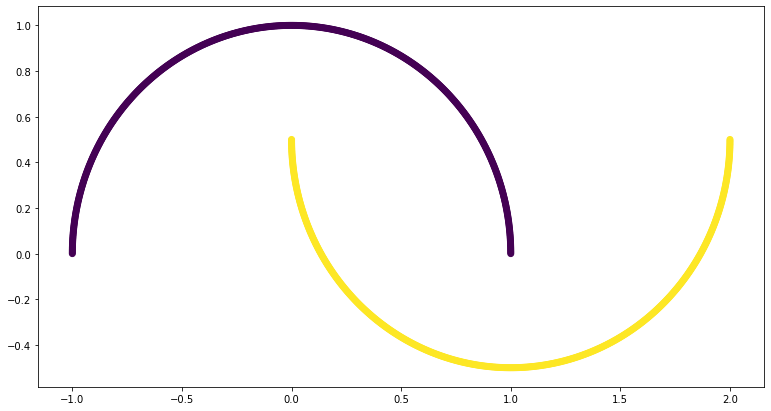

In [6]:
plt.figure(figsize=(13,7))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (800, 2), Test feature set shape: (200, 2) 
Train set labels shape: (800,), Test set labels shape: (200,) 


In [8]:
max_depth_param_list = np.arange(2, 22)
score_results_dt = []

for depth in max_depth_param_list:
    model_dt = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    Kfold = KFold(n_splits = 10)
    score = cross_val_score(model_dt, X_train, y_train, cv = Kfold, scoring = "accuracy")
    score_results_dt.append(score)
    print("max_depth: %s, avg_cv_score: %s" % (depth, np.mean(score)))

max_depth: 2, avg_cv_score: 0.9099999999999999
max_depth: 3, avg_cv_score: 0.9125
max_depth: 4, avg_cv_score: 0.9137500000000001
max_depth: 5, avg_cv_score: 0.99375
max_depth: 6, avg_cv_score: 0.99375
max_depth: 7, avg_cv_score: 0.99375
max_depth: 8, avg_cv_score: 0.99375
max_depth: 9, avg_cv_score: 0.99375
max_depth: 10, avg_cv_score: 0.99375
max_depth: 11, avg_cv_score: 0.99375
max_depth: 12, avg_cv_score: 0.99375
max_depth: 13, avg_cv_score: 0.99375
max_depth: 14, avg_cv_score: 0.99375
max_depth: 15, avg_cv_score: 0.99375
max_depth: 16, avg_cv_score: 0.99375
max_depth: 17, avg_cv_score: 0.99375
max_depth: 18, avg_cv_score: 0.99375
max_depth: 19, avg_cv_score: 0.99375
max_depth: 20, avg_cv_score: 0.99375
max_depth: 21, avg_cv_score: 0.99375


In [9]:
avg_cv_scores = np.mean(np.array(score_results_dt), axis = 1)

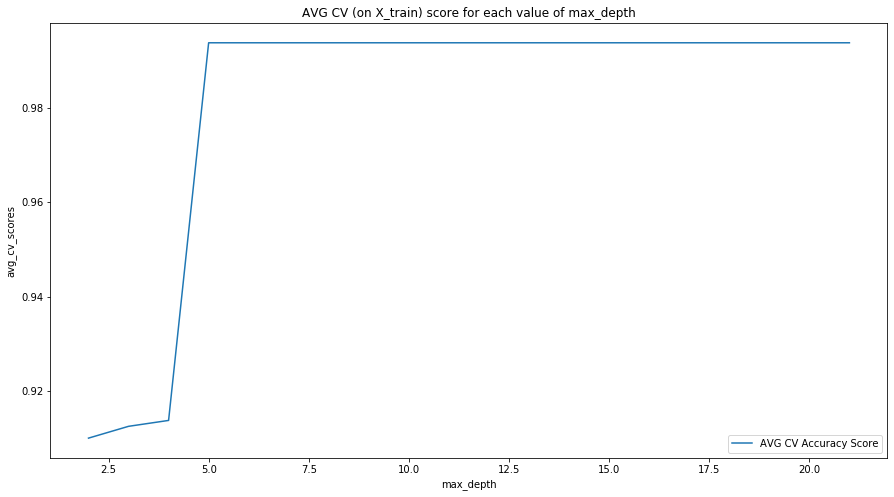

In [10]:
plt.figure(figsize = (15, 8))
plt.plot(max_depth_param_list, avg_cv_scores, label = "AVG CV Accuracy Score")
plt.title("AVG CV (on X_train) score for each value of max_depth")
plt.xlabel("max_depth")
plt.ylabel("avg_cv_scores")
plt.legend()
plt.show()

In [11]:
max_avg_accuracy_index = np.argmax(avg_cv_scores) 
optimal_max_depth = max_depth_param_list[max_avg_accuracy_index]
print("Best Value for max_depth: %s" % optimal_max_depth)

Best Value for max_depth: 5


In [12]:
mod_dt_optimal = DecisionTreeClassifier(max_depth = optimal_max_depth, random_state = 10)
mod_dt_optimal = mod_dt_optimal.fit(X_train, y_train)
print("Model Score on X_train %s" % round(mod_dt_optimal.score(X_train,y_train), 3))
print("Model Score on X_test %s" % round(mod_dt_optimal.score(X_test,y_test), 3))

Model Score on X_train 1.0
Model Score on X_test 1.0


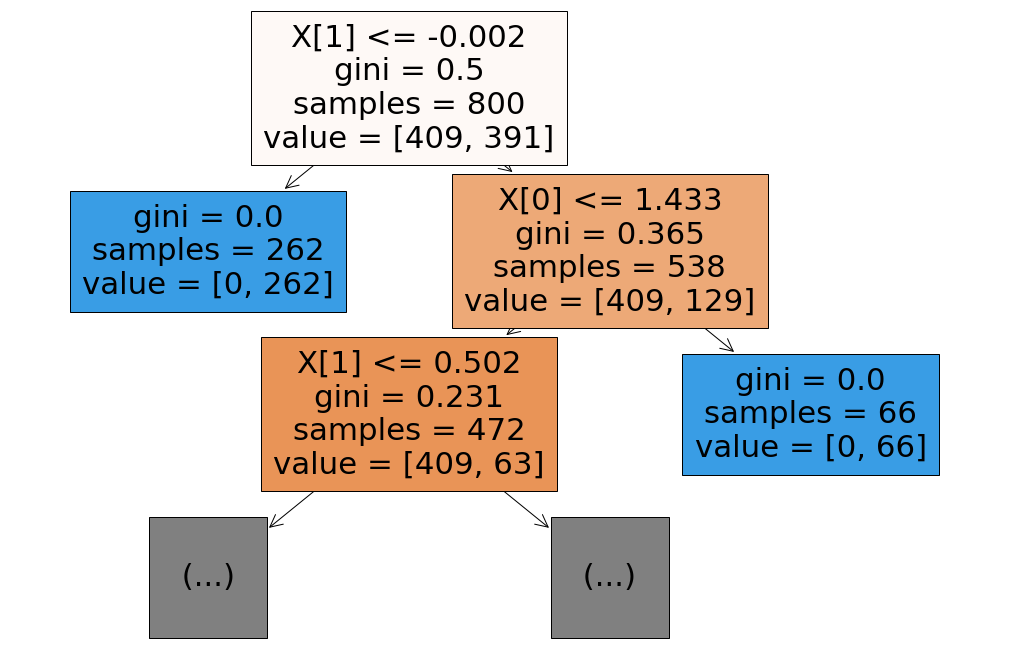

In [13]:
plt.figure(figsize = (18,12))
tree.plot_tree(mod_dt_optimal, filled = True, node_ids = False, max_depth = 2)
plt.show()

In [14]:
y_train_predict = mod_dt_optimal.predict(X_train)
y_train_predict_proba = mod_dt_optimal.predict_proba(X_train)

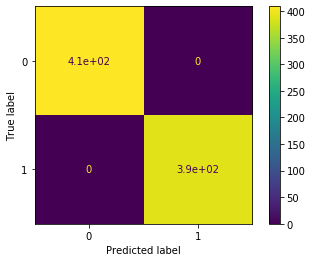

In [15]:
plot_confusion_matrix(mod_dt_optimal, X_train, y_train, display_labels = np.array([0,1]))
plt.show()

In [16]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       391

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [17]:
y_test_predict = mod_dt_optimal.predict(X_test)
y_test_predict_proba = mod_dt_optimal.predict_proba(X_test)

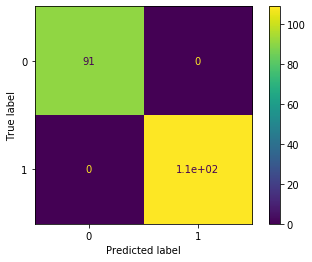

In [18]:
plot_confusion_matrix(mod_dt_optimal, X_test, y_test, display_labels = np.array([0, 1]))
plt.show()

In [19]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [20]:
fpr0_test, tpr0_test, thresholds0_test = roc_curve(y_test, y_test_predict_proba[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_test, tpr0_test))

fpr1_test, tpr1_test, thresholds1_test = roc_curve(y_test, y_test_predict_proba[:,1], pos_label = 1) 
print("ROC: AUC Class 1: ", auc(fpr1_test, tpr1_test))

p0_test, r0_test, thresholds0_test = precision_recall_curve(y_test, y_test_predict_proba[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_test, p0_test))

p1_test, r1_test, thresholds1_test = precision_recall_curve(y_test, y_test_predict_proba[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_test, p1_test))


ROC: AUC Class 0:  1.0
ROC: AUC Class 1:  1.0
Precision-Recall: AUC Class 0: 1.0
Precision-Recall: AUC Class 1: 1.0


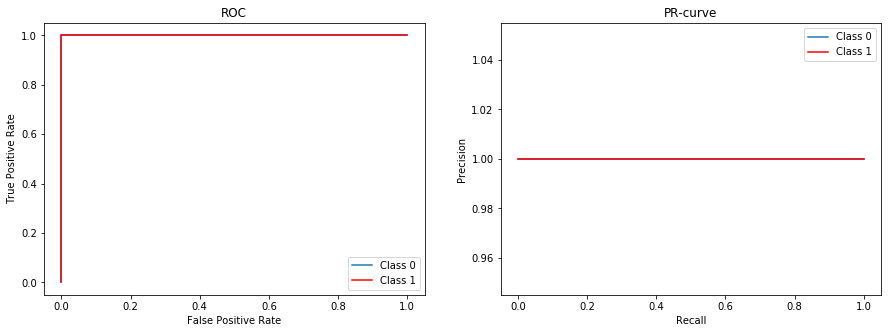

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_test, tpr0_test, "-", label = "Class 0")
plt.plot(fpr1_test, tpr1_test, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_test, p0_test, "-", label = "Class 0")
plt.plot(r1_test, p1_test, "-", color = 'r', label = "Class 1")
plt.title("PR-curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.show()

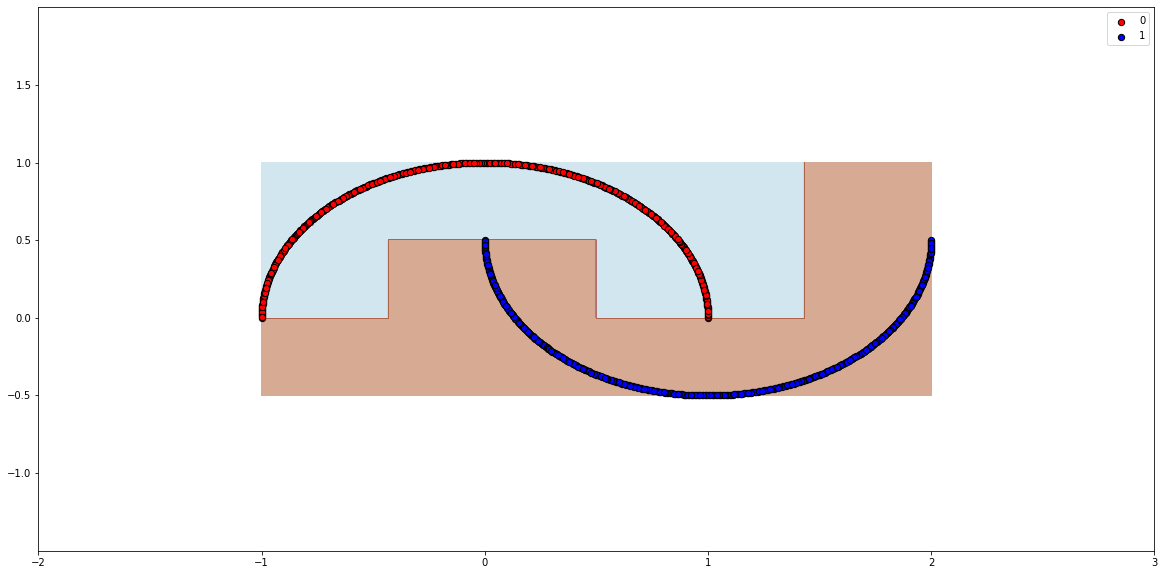

In [23]:
classes = 2 
colors = 'rb'
names = '01'
Decision_Boundary(mod_dt_optimal, X, y, n_points = 500, n_classes = classes, colors = colors, class_names = names)

## make_classification

In [ ]:
X, y = make_classification(n_samples = 1000, n_features = 12, n_informative = 10,\
                          n_classes = 5, random_state = 10)
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
max_depths = np.arange(2,22)
scores = []

for depth in max_depths:
    mod_dt = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    cvs = cross_val_score(mod_dt, X_train, y_train, cv = 10)
    score = np.mean(cvs)
    scores.append(score)
    print("depth: %s, score: %s" % (depth, score))

In [ ]:
max_index = np.argmax(scores)
optimal_max_depth = max_depths[max_index]
print("optimal max depth: ", optimal_max_depth)

In [ ]:
mod_dt_optimal = DecisionTreeClassifier(max_depth = optimal_max_depth)
mod_dt_optimal.fit(X_train, y_train)

y_train_predict = mod_dt_optimal.predict(X_train)
y_train_predict_proba = mod_dt_optimal.predict_proba(X_train)
y_test_predict = mod_dt_optimal.predict(X_test)
y_test_predict_proba = mod_dt_optimal.predict_proba(X_test)

In [ ]:
max_depths = np.arange(1,21)
scores = []

for depth in max_depths:
    mod_rf = RandomForestClassifier(max_depth = depth, max_features = 4,\
                                    n_estimators = 200, oob_score = True,\
                                    random_state = 10)
    cvs = cross_val_score(mod_rf, X_train, y_train, cv = 10)
    score = np.mean(cvs)
#     mod_rf.fit(X_train, y_train)
#     score = mod_rf.oob_score_
    scores.append(score)
    print("depth: %s, score: %s" % (depth, score))

In [ ]:
max_index = np.argmax(scores)
optimal_max_depth = max_depths[max_index]
print("optimal max depth: ", optimal_max_depth)

In [ ]:
mod_rf_optimal = RandomForestClassifier(max_depth = optimal_max_depth,\
                                        max_features = 4, n_estimators = 200,\
                                        oob_score = True, random_state = 10)
mod_rf_optimal.fit(X_train, y_train)

y_train_predict = mod_rf_optimal.predict(X_train)
y_train_predict_proba = mod_rf_optimal.predict_proba(X_train)
y_test_predict = mod_rf_optimal.predict(X_test)
y_test_predict_proba = mod_rf_optimal.predict_proba(X_test)

In [ ]:
max_depths = np.arange(2, 11)
scores = []

for depth in max_depths:
    mod_gb = GradientBoostingClassifier(max_depth = depth, random_state = 10)
    cvs = cross_val_score(mod_gb, X_train, y_train, cv = 10)
    score = np.mean(cvs)
    scores.append(score)
    print("depth: %s, score: %s" % (depth, score))

In [ ]:
max_index = np.argmax(scores)
optimal_max_depth = max_depths[max_index]
print("optimal max depth: ", optimal_max_depth)

In [ ]:
mod_gb_optimal = GradientBoostingClassifier(max_depth = optimal_max_depth,\
                                        random_state = 10)
mod_gb_optimal.fit(X_train, y_train)

y_train_predict = mod_gb_optimal.predict(X_train)
y_train_predict_proba = mod_gb_optimal.predict_proba(X_train)
y_test_predict = mod_gb_optimal.predict(X_test)
y_test_predict_proba = mod_gb_optimal.predict_proba(X_test)

In [ ]:
max_depths = np.arange(9, 20)
scores = []

for depth in max_depths:
    mod_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = depth, random_state = 10),\
                                n_estimators = 100, learning_rate = 1,\
                                random_state = 10)
    cvs = cross_val_score(mod_ab, X_train, y_train, cv = 10)
    score = np.mean(cvs)
    scores.append(score)
    print("depth: %s, score: %s" % (depth, score))

In [ ]:
max_index = np.argmax(scores)
optimal_max_depth = max_depths[max_index]
print("optimal max depth: ", optimal_max_depth)

In [ ]:
mod_ab_optimal = AdaBoostClassifier(DecisionTreeClassifier(max_depth = optimal_max_depth, random_state = 10),\
                                n_estimators = 100, learning_rate = 1,\
                                random_state = 10)
mod_ab_optimal.fit(X_train, y_train)

y_train_predict = mod_ab_optimal.predict(X_train)
y_train_predict_proba = mod_ab_optimal.predict_proba(X_train)
y_test_predict = mod_ab_optimal.predict(X_test)
y_test_predict_proba = mod_ab_optimal.predict_proba(X_test)

## SVR

## SVC

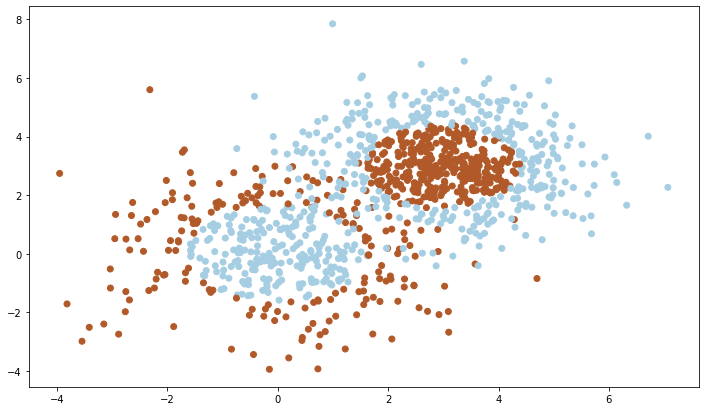

In [24]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=400, n_features=2, n_classes = 2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=700, n_features=2, n_classes=2, random_state=1)   

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

In [26]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

X has shapes: (1100, 2), y has shape: (1100,)
Train feature set shape: (880, 2), Test feature set shape: (220, 2) 
Train set labels shape: (880,), Test set labels shape: (220,) 


In [39]:
mod_svc_lin = SVC(max_iter = 100000, kernel = 'poly', degree = 1, random_state=10)
mod_svc_lin.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=100000, probability=False, random_state=10, shrinking=True,
    tol=0.001, verbose=False)

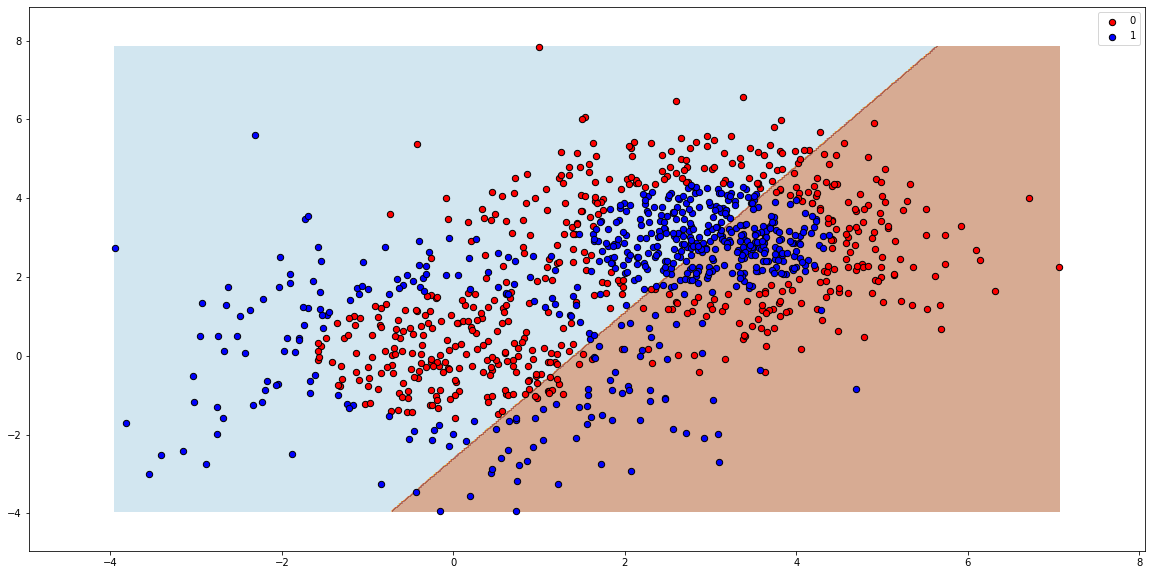

In [40]:
colors = 'rb'
class_names = '01'
Decision_Boundary(mod_svc_lin,X,y,n_points=500, n_classes=2, colors = colors, class_names = class_names)

In [42]:
mod_svc_lin.score(X,y)

0.55

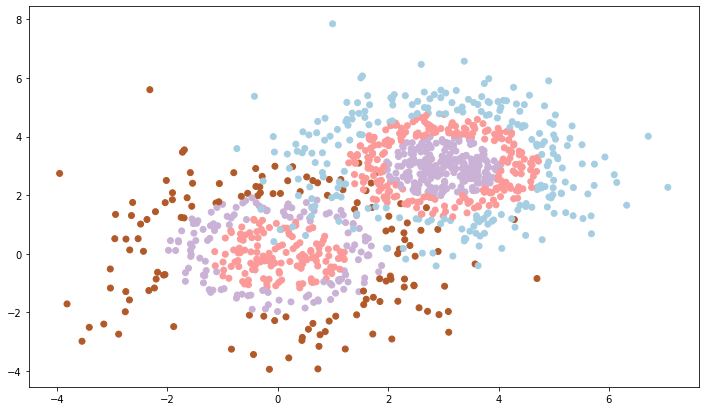

In [43]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=400, n_features=2, n_classes = 3, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=700, n_features=2, n_classes=3, random_state=1)   

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))
y = y + 1
plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

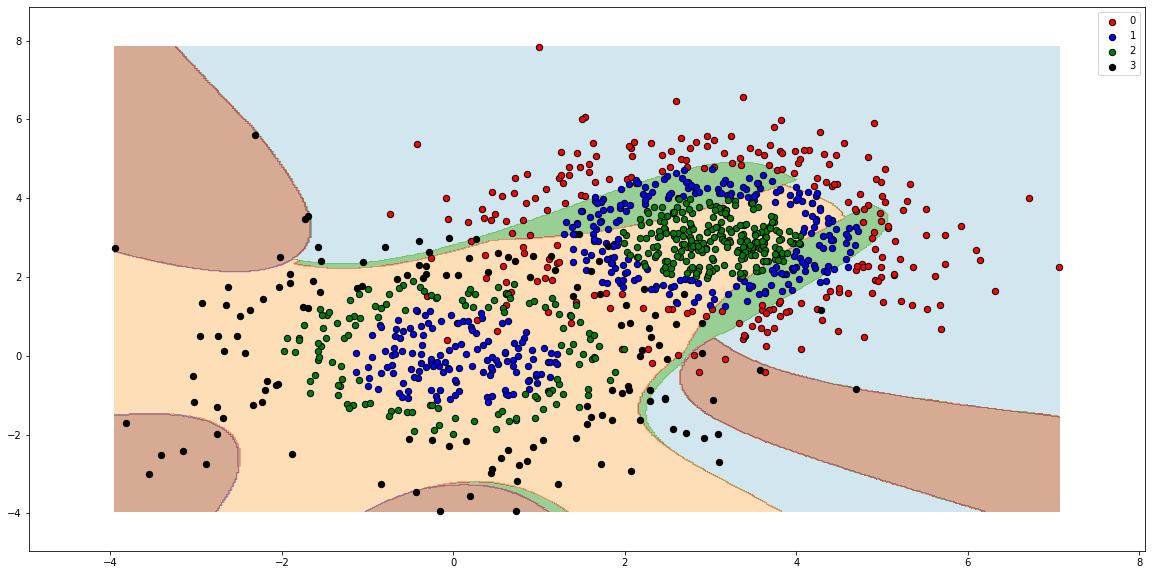

In [44]:
mod_svm_poly = SVC(kernel = "poly", degree = 5)
mod_svm_poly.fit(X,y)

classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(mod_svm_poly,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [45]:
mod_svm_poly.score(X,y)

0.6018181818181818